In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

%reload_ext autoreload
import geopandas as gpd
import pandas as pd
import fiona
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,10]

from functools import partial
import pyproj
from shapely.ops import transform

#these are the datasets we are working with
villages = gpd.GeoDataFrame.from_file('data/villages-mn.shp', driver='ESRI Shapefile')
streets = gpd.read_file('data/streets-mn.shp', driver='ESRI Shapefile')
trees = gpd.read_file('data/trees-mn.shp', driver='ESRI Shapefile')


In [2]:
villages = villages.to_crs(epsg=26918)
streets = streets.to_crs(epsg=26918)
trees = trees.to_crs(epsg=26918)

In [3]:
len(villages)

29

In [4]:
len(villages)

29

In [5]:
villages

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry
0,1,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.685475,"POLYGON ((588876.1785597933 4519450.267877867,..."
1,1,Manhattan,061,MN17,Midtown-Midtown South,3.019206e+07,27035.738062,"POLYGON ((586678.6911153347 4513097.574779067,..."
2,1,Manhattan,061,MN19,Turtle Bay-East Midtown,1.739787e+07,21638.781375,(POLYGON ((587703.2741437969 4510461.153370242...
3,1,Manhattan,061,MN20,Murray Hill-Kips Bay,1.446596e+07,23135.103743,(POLYGON ((587623.6256422841 4509648.642779417...
4,1,Manhattan,061,MN21,Gramercy,7.531311e+06,12092.422832,"POLYGON ((586251.3783624729 4510040.811386588,..."
5,1,Manhattan,061,MN27,Chinatown,1.450187e+07,20786.255196,"POLYGON ((585821.3946368636 4508335.179919497,..."
6,1,Manhattan,061,MN50,Stuyvesant Town-Cooper Village,5.573902e+06,11000.177313,(POLYGON ((587630.0675326242 4508660.108073168...
7,1,Manhattan,061,MN34,East Harlem North,2.449487e+07,30603.208700,(POLYGON ((590501.9336688609 4516815.013944671...
8,1,Manhattan,061,MN31,Lenox Hill-Roosevelt Island,2.150148e+07,37708.443102,(POLYGON ((589306.8937351991 4513658.171538641...
9,1,Manhattan,061,MN04,Hamilton Heights,1.609379e+07,17410.823138,"POLYGON ((589347.2057885575 4520476.782137589,..."


In [6]:
from datetime import datetime

m = trees.created_at

def get_date(x):
    dt = datetime.strptime(x, '%m/%d/%Y')
    return dt

trees['created_custom'] = trees.created_at.apply(lambda x: get_date(x))

In [7]:
t = trees.created_custom
print t.min(), t.max()

2015-05-19 00:00:00 2016-10-03 00:00:00


/Users/nikosbogdos/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


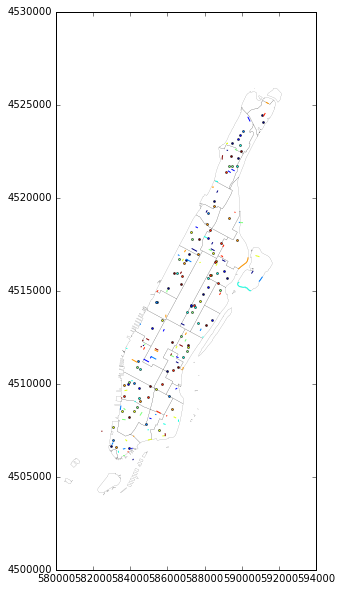

In [8]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
villages.sample(29).plot(ax=ax, color="white", linewidth=.1)
trees.sample(100).plot(ax=ax) # there are 6500 trees
streets.sample(100).plot(ax=ax)
#villages

In [9]:
trees.head()

,address,block_id,boro_ct,borocode,boroname,brnch_ligh,brnch_othe,brnch_shoe,cb_num,cncldist,...,trnk_light,trnk_other,trnk_wire,user_type,village,x_sp,y_sp,zip_city,zipcode,created_custom
0,8 COLUMBUS AVENUE,106099.0,1014500,1,Manhattan,No,No,No,107,3.0,...,No,No,No,Volunteer,Lincoln Square,988418.699656,219825.522669,New York,10023,2015-08-30
1,120 WEST 60 STREET,106099.0,1014500,1,Manhattan,No,No,No,107,3.0,...,No,No,No,Volunteer,Lincoln Square,988311.190028,219885.278455,New York,10023,2015-08-30
2,311 WEST 50 STREET,103940.0,1012700,1,Manhattan,No,No,No,104,3.0,...,No,No,No,Volunteer,Clinton,987769.116309,217157.856088,New York,10019,2015-09-07
3,170 EAST 75 STREET,107600.0,1012800,1,Manhattan,No,Yes,No,108,4.0,...,No,Yes,No,Volunteer,Upper East Side-Carnegie Hill,995203.003673,220602.155302,New York,10021,2015-08-31
4,2163 BROADWAY,107038.0,1016300,1,Manhattan,No,No,No,107,6.0,...,No,No,No,TreesCount Staff,Upper West Side,989521.741413,224212.887582,New York,10024,2015-09-03


In [10]:
trees.columns

Index([       u'address',       u'block_id',        u'boro_ct',
             u'borocode',       u'boroname',     u'brnch_ligh',
           u'brnch_othe',     u'brnch_shoe',         u'cb_num',
             u'cncldist',     u'created_at',       u'curb_loc',
             u'geometry',         u'guards',         u'health',
             u'latitude',      u'longitude',            u'nta',
             u'nta_name',       u'problems',     u'root_grate',
           u'root_other',     u'root_stone',       u'sidewalk',
           u'spc_common',      u'spc_latin',       u'st_assem',
            u'st_senate',          u'state',         u'status',
              u'steward',     u'stump_diam',       u'tree_dbh',
              u'tree_id',     u'trnk_light',     u'trnk_other',
            u'trnk_wire',      u'user_type',        u'village',
                 u'x_sp',           u'y_sp',       u'zip_city',
              u'zipcode', u'created_custom'],
      dtype='object')

In [11]:
villages.columns

Index([  u'BoroCode',   u'BoroName', u'CountyFIPS',    u'NTACode',
          u'NTAName', u'Shape_Area', u'Shape_Leng',   u'geometry'],
      dtype='object')

In [12]:
villages.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry
0,1,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.685475,"POLYGON ((588876.1785597933 4519450.267877867,..."
1,1,Manhattan,061,MN17,Midtown-Midtown South,3.019206e+07,27035.738062,"POLYGON ((586678.6911153347 4513097.574779067,..."
2,1,Manhattan,061,MN19,Turtle Bay-East Midtown,1.739787e+07,21638.781375,(POLYGON ((587703.2741437969 4510461.153370242...
3,1,Manhattan,061,MN20,Murray Hill-Kips Bay,1.446596e+07,23135.103743,(POLYGON ((587623.6256422841 4509648.642779417...
4,1,Manhattan,061,MN21,Gramercy,7.531311e+06,12092.422832,"POLYGON ((586251.3783624729 4510040.811386588,..."


In [13]:
if 'village' not in trees.columns:
    def find(x):
        v = villages[villages.intersects(x)]['NTAName'].iloc[0]
        return v 
    trees['village'] = trees['geometry'].apply(lambda x: find(x))
    # let's save this to not run again in future
    trees.to_file('data/trees-mn.shp')

In [14]:
trees_dead = trees.loc[trees['status']=="Dead"]
trees_dead.head()
len(trees_dead)

1802

In [16]:
groups = trees.groupby('village')
groups.get_group('Upper West Side').describe()
#groups.get_group('Marble Hill-Inwood').describe()

,block_id,cncldist,latitude,longitude,st_assem,st_senate,stump_diam,tree_dbh,tree_id,x_sp,y_sp
count,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000
mean,125657.646988,6.153566,40.790141,-73.973434,68.195983,30.115132,0.133483,9.934557,208789.676939,991606.189989,227147.700336
std,94649.108591,0.360564,0.006040,0.005132,0.980692,0.830004,1.605515,5.619435,121591.624191,1420.612161,2200.914051
min,106311.000000,6.000000,40.777677,-73.985722,67.000000,29.000000,0.000000,0.000000,2702.000000,988204.160387,222606.455755
25%,106500.000000,6.000000,40.785294,-73.977237,67.000000,29.000000,0.000000,6.000000,133930.750000,990554.213101,225381.472269
50%,106663.000000,6.000000,40.789937,-73.973360,69.000000,30.000000,0.000000,10.000000,190502.500000,991626.439632,227073.354794
75%,106862.000000,6.000000,40.795076,-73.969815,69.000000,31.000000,0.000000,13.000000,223726.250000,992608.448822,228946.394930
max,602375.000000,7.000000,40.802384,-73.960324,69.000000,31.000000,60.000000,54.000000,722674.000000,995235.249015,231608.563735


In [17]:
trees.head()

,address,block_id,boro_ct,borocode,boroname,brnch_ligh,brnch_othe,brnch_shoe,cb_num,cncldist,...,trnk_light,trnk_other,trnk_wire,user_type,village,x_sp,y_sp,zip_city,zipcode,created_custom
0,8 COLUMBUS AVENUE,106099.0,1014500,1,Manhattan,No,No,No,107,3.0,...,No,No,No,Volunteer,Lincoln Square,988418.699656,219825.522669,New York,10023,2015-08-30
1,120 WEST 60 STREET,106099.0,1014500,1,Manhattan,No,No,No,107,3.0,...,No,No,No,Volunteer,Lincoln Square,988311.190028,219885.278455,New York,10023,2015-08-30
2,311 WEST 50 STREET,103940.0,1012700,1,Manhattan,No,No,No,104,3.0,...,No,No,No,Volunteer,Clinton,987769.116309,217157.856088,New York,10019,2015-09-07
3,170 EAST 75 STREET,107600.0,1012800,1,Manhattan,No,Yes,No,108,4.0,...,No,Yes,No,Volunteer,Upper East Side-Carnegie Hill,995203.003673,220602.155302,New York,10021,2015-08-31
4,2163 BROADWAY,107038.0,1016300,1,Manhattan,No,No,No,107,6.0,...,No,No,No,TreesCount Staff,Upper West Side,989521.741413,224212.887582,New York,10024,2015-09-03


In [18]:
shd = []
# summer
shd.append(pd.read_csv('data/tree-shade-june-21.csv'))
# fall and spring
shd.append(pd.read_csv('data/tree-shade-sep-22.csv'))
# winter
shd.append(pd.read_csv('data/tree-shade-dec-21.csv'))

In [19]:
shd

[        tree_id  time
 0        180683    78
 1        200540     0
 2        204026   318
 3        204337   169
 4        189565   145
 5        190422   539
 6        190426   429
 7        208649   484
 8        209610    26
 9        192755     3
 10       203719   236
 11       203726   155
 12       195202     0
 13       189465   365
 14       192998   310
 15       189834    48
 16       204208   338
 17       161339   352
 18       187311   192
 19       208201   402
 20       193093    39
 21       193310   533
 22       199760   525
 23       204325   109
 24       189700   162
 25       205044   145
 26       192942   171
 27       195265   308
 28       201555   392
 29       208407    47
 ...         ...   ...
 683758   183515   164
 683759   179860    88
 683760   178849   250
 683761   191692   192
 683762   180028   440
 683763   195286   268
 683764   170513   369
 683765   192369   297
 683766   198289    71
 683767   203987   217
 683768   190040   328
 683769   1

In [23]:
# season_shadow captures the time the tree is in shadow
# season_sun captures the time when the tree is not in shadow
tree_shd = {}

def extract_sun(season_shadow,season_sun,shade_max,shd):

    for i,r in shd.iterrows():

        id = r['tree_id']

        if id not in tree_shd:
            tree_shd[id] = {}

        tree_shd[id][season_shadow] = r['time']
        tree_shd[id][season_sun] = shade_max-r['time']

extract_sun('summer', 'summer_sun', 720, shd[0])
extract_sun('fall', 'fall_sun', 540, shd[1])
extract_sun('winter','winter_sun', 360, shd[2])

KeyboardInterrupt: 

In [ ]:
tree_shd[180683]

In [21]:
# create an array with all trees, their health, and the time in shade and sun
tree_all_info = {}

for i,r in trees.iterrows():
    id = r['tree_id']
    if id not in tree_all_info:
            tree_all_info[id] = {}
            
    # copy tree fields
    tree_all_info[id]['tree_id'] = id    
    tree_all_info[id]['health'] = r['health']
    tree_all_info[id]['status'] = r['status']
    tree_all_info[id]['spc_common'] = r['spc_common']
    tree_all_info[id]['village'] = r['village']
    
    # make health numeric 
    if r['health']=="Good":
         tree_all_info[id]['health_num'] = 20
    if r['health']=="Poor":
         tree_all_info[id]['health_num'] = 5
    if r['health']=="Fair":
         tree_all_info[id]['health_num'] = 10
    if r['health']=="None":
         tree_all_info[id]['health_num'] = 0
            
    # copy shade/sun fields
    tree_all_info[id]['fall'] = tree_shd[id]['fall']
    tree_all_info[id]['fall_sun'] = tree_shd[id]['fall_sun']
    tree_all_info[id]['summer'] = tree_shd[id]['summer']
    tree_all_info[id]['summer_sun'] = tree_shd[id]['summer_sun']
    tree_all_info[id]['winter'] = tree_shd[id]['winter']
    tree_all_info[id]['winter_sun'] = tree_shd[id]['fall_sun']
    tree_all_info[id]['all_shade'] = 2*tree_shd[id]['fall'] + tree_shd[id]['summer'] + tree_shd[id]['winter']
    tree_all_info[id]['all_sun'] = 2*tree_shd[id]['fall_sun'] + tree_shd[id]['summer_sun'] + tree_shd[id]['winter_sun']



KeyError: 'winter'